
```
# This is formatted as code
```

# <font style="color:rgb(50,120,229)">Edges using OpenCV</font>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font style="color:rgb(50,120,229)">Sobel filter</font>

Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator. [Link](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

In all cases except one, the 𝚔𝚜𝚒𝚣𝚎×𝚔𝚜𝚒𝚣𝚎 separable kernel is used to calculate the derivative. When 𝚔𝚜𝚒𝚣𝚎 = 𝟷, the 3×1 or 1×3 kernel is used (that is, no Gaussian smoothing is done). ksize = 1 can only be used for the first or the second x- or y- derivatives.

The Sobel operators combine Gaussian smoothing and differentiation, so the result is more or less resistant to the noise. Most often, the function is called with ( xorder = 1, yorder = 0, ksize = 3) or ( xorder = 0, yorder = 1, ksize = 3) to calculate the first x- or y- image derivative. The first case corresponds to a kernel of:

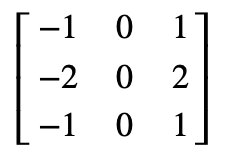

The second case corresponds to a kernel of:

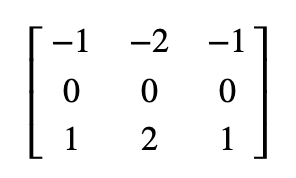




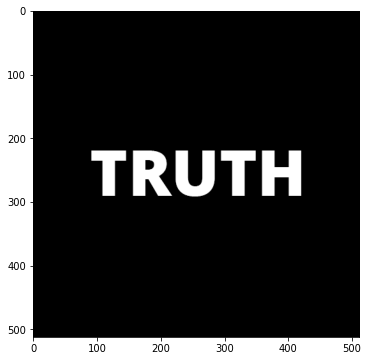

In [3]:
# Read color image
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/Computer Vision course/CV/images/'
filename = DATA_PATH+"truth.png"
img = plt.imread(filename)
plt.imshow(img);

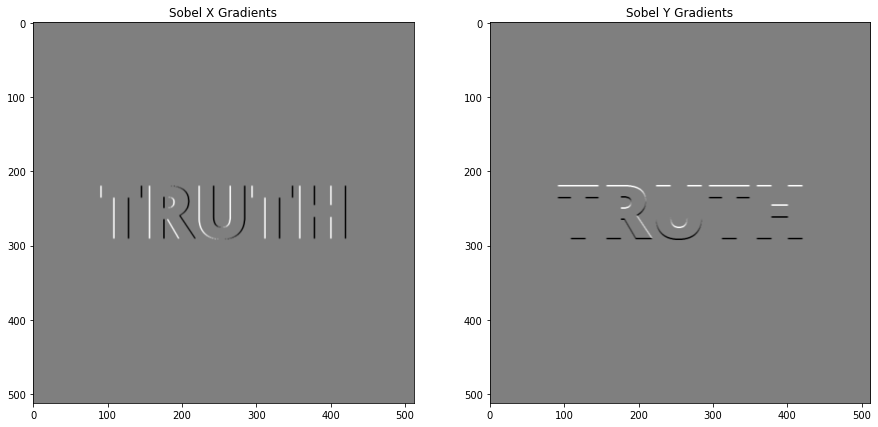

In [4]:
# Apply sobel filter along x direction
sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
# Apply sobel filter along y direction
sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1)

# Normalize image for display
cv2.normalize(sobelx,
                dst = sobelx,
                alpha = 0,
                beta = 1,
                norm_type = cv2.NORM_MINMAX,
                dtype = cv2.CV_32F)
cv2.normalize(sobely,
                dst = sobely,
                alpha = 0,
                beta = 1,
                norm_type = cv2.NORM_MINMAX,
                dtype = cv2.CV_32F)

# Display Output
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(sobelx);plt.title("Sobel X Gradients")
plt.subplot(122);plt.imshow(sobely);plt.title("Sobel Y Gradients");


## <font style="color:rgb(50,120,229)">Sharpening</font>

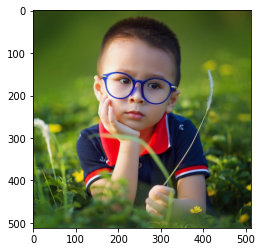

In [ ]:
# Read color image
filename = DATA_PATH+"sample.jpg"
img = plt.imread(filename)
plt.imshow(img);

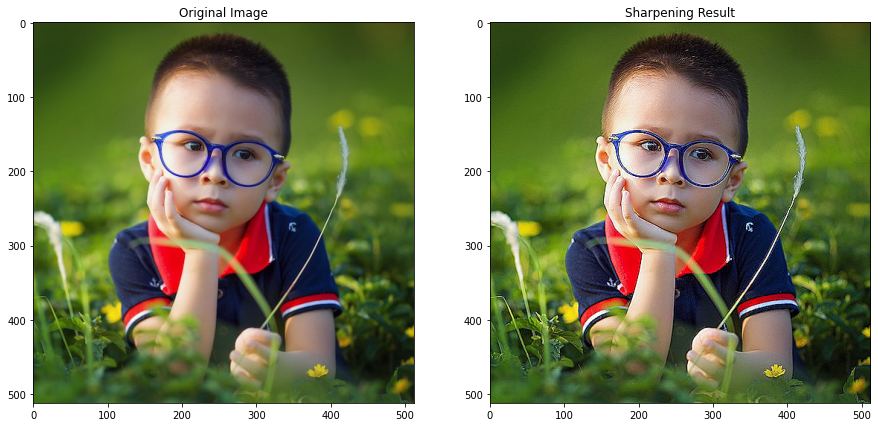

In [ ]:
# Sharpen kernel
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# Using 2D filter by applying the sharpening kernel
sharpenOutput = cv2.filter2D(img, -1, sharpen)

# Display Output
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(img);plt.title("Original Image")
plt.subplot(122);plt.imshow(sharpenOutput);plt.title("Sharpening Result");

## <font style = "color:rgb(50,120,229)">Laplacian</font>
Calculates the Laplacian of an image. [Link](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)

The function calculates the Laplacian of the source image by adding up the second x and y derivatives calculated using the Sobel operator:

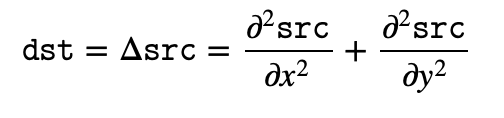

This is done when ksize > 1. When ksize == 1, the Laplacian is computed by filtering the image with the following 3×3 aperture:

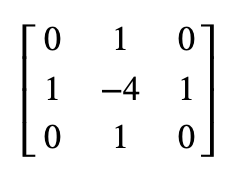

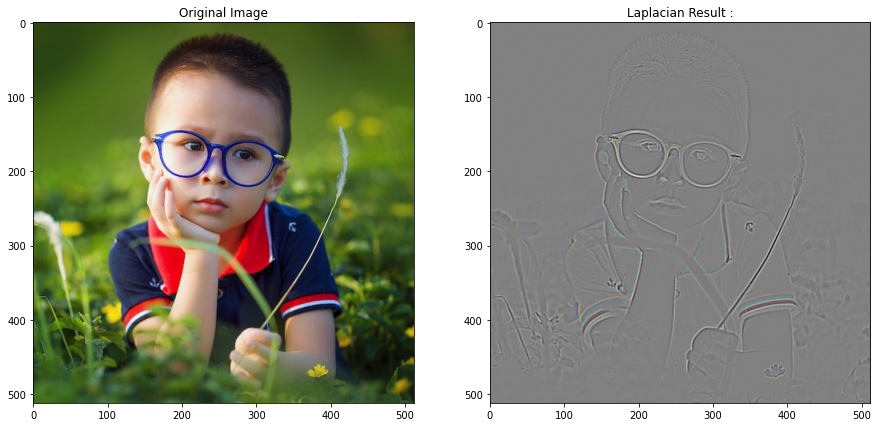

In [ ]:
kernelSize = 3

# Applying laplacian
img1 = cv2.GaussianBlur(img,(3,3),0,0)
laplacian = cv2.Laplacian(img1, cv2.CV_32F, ksize = kernelSize,
                            scale = 1, delta = 0)

# Normalize results
cv2.normalize(laplacian,
                dst = laplacian,
                alpha = 0,
                beta = 1,
                norm_type = cv2.NORM_MINMAX,
                dtype = cv2.CV_32F)

# Display Output
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(img);plt.title("Original Image")
plt.subplot(122);plt.imshow(laplacian);plt.title("Laplacian Result :");